AxesImage(size=(256, 256))
[[0.48848392 0.64534667 0.41789569 ... 0.53135333 0.60978471 0.60978471]
 [0.53162118 0.51985647 0.48848392 ... 0.56664745 0.51566706 0.5352749 ]
 [0.4531898  0.53946431 0.61397412 ... 0.65684353 0.59017686 0.58233373]
 ...
 [0.24538431 0.30028627 0.27675686 ... 0.23559176 0.20029765 0.27480745]
 [0.23754118 0.26891373 0.22969804 ... 0.35323882 0.32186627 0.25912118]
 [0.26499216 0.4218549  0.23361961 ... 0.27480745 0.30225843 0.19637608]]


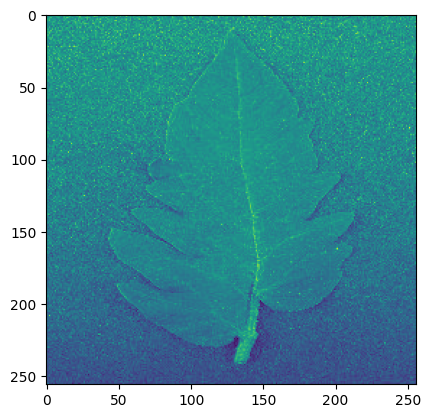

In [47]:
#import necessary library
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.filters.rank import entropy
from skimage.morphology import disk

#read image
myimage = io.imread("img_healthy1.JPG", as_gray=True)

print(plt.imshow(myimage))
print(myimage)

In [ ]:
#segmentation techniques
#

C:\Users\arfan.shah\AppData\Local\Temp\ipykernel_18628\2427877290.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  entropy_image = entropy(myimage, disk(3))


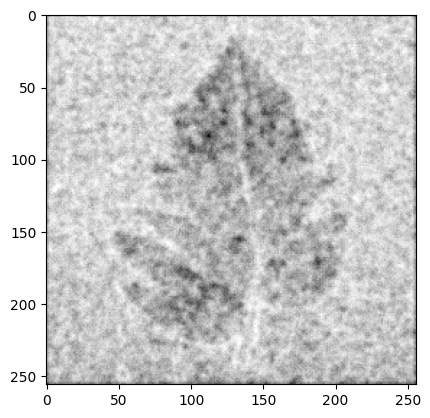

In [48]:
entropy_image = entropy(myimage, disk(3))
plt.imshow(entropy_image, cmap='gray')

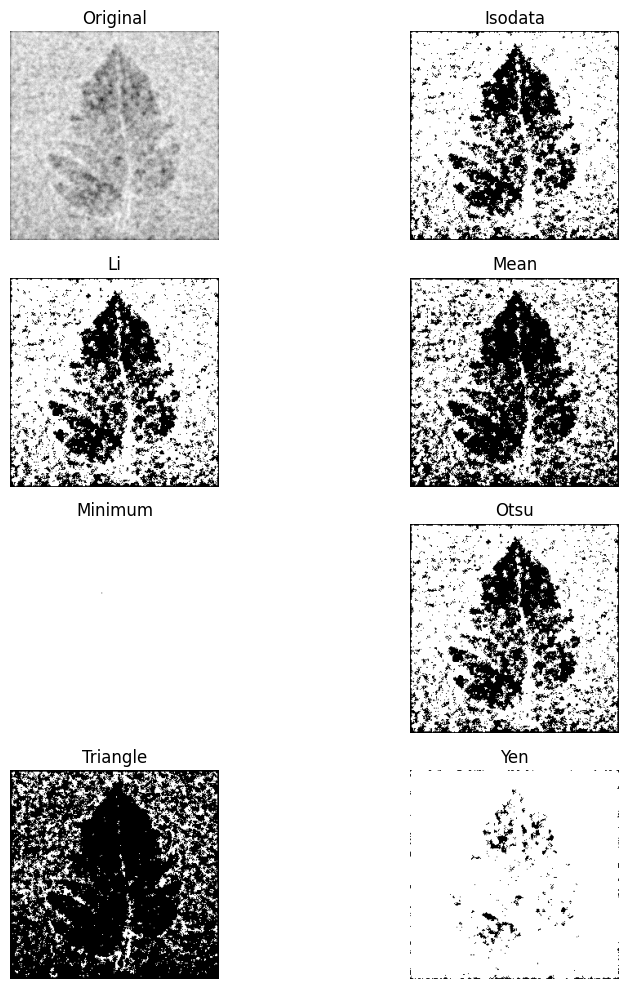

In [44]:
from skimage.filters import try_all_threshold

figs, ax = try_all_threshold(entropy_image, figsize = (10, 10), verbose = False)
plt.show()

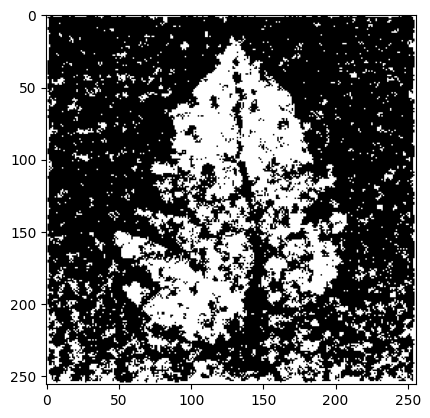

In [49]:
#now lets perform otsu thresholding
from skimage.filters import threshold_otsu
otsu_thresh = threshold_otsu(entropy_image)
binary_image = entropy_image <= otsu_thresh
plt.imshow(binary_image, cmap='gray')

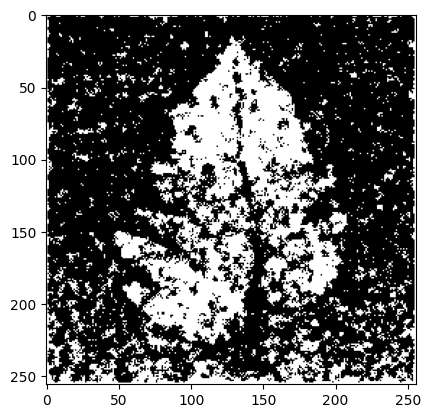

In [50]:
#now lets perform li thresholding
from skimage.filters import threshold_li
li_thresh = threshold_li(entropy_image)
binary_image = entropy_image <= li_thresh
plt.imshow(binary_image, cmap='gray')

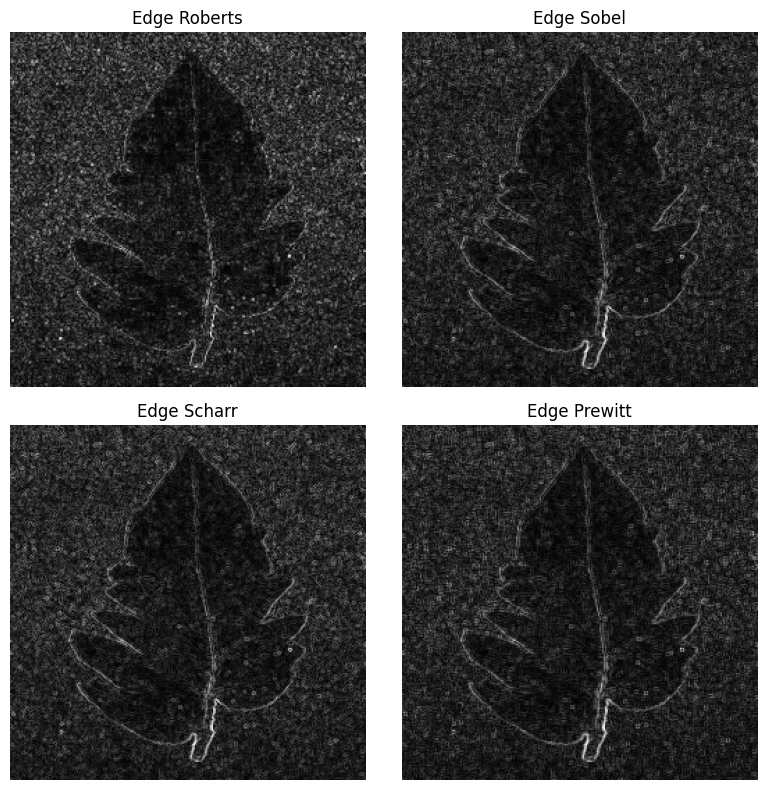

In [22]:
#lets do now some filtering
from skimage.filters import roberts, sobel, scharr, prewitt

edge_robert = roberts(myimage)
edge_sobel = sobel(myimage)
edge_scharr = scharr(myimage)
edge_prewitt = prewitt(myimage)

figs, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize = (8, 8))
ax = axes.ravel()

ax[0].imshow(adge_robert, cmap=plt.cm.gray)
ax[0].set_title("Edge Roberts")

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title("Edge Sobel")

ax[2].imshow(edge_scharr, cmap=plt.cm.gray)
ax[2].set_title("Edge Scharr")

ax[3].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[3].set_title("Edge Prewitt")

for i in ax:
    i.axis('off')

plt.tight_layout()
plt.show()

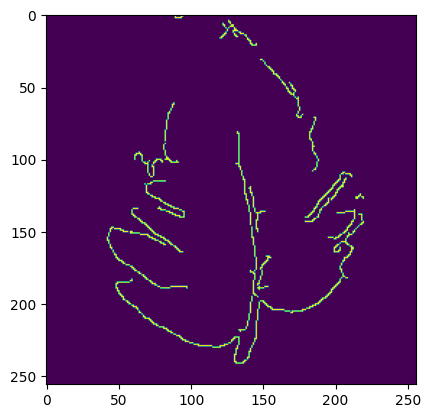

In [37]:
#lets now do canny 
from skimage.feature import canny

canny_image = canny(myimage, sigma=1.58)
plt.imshow(canny_image)

AxesImage(size=(64, 64))
[[0.547031   0.53217026 0.53302814 ... 0.5228501  0.53069837 0.55818047]
 [0.53062535 0.53760886 0.52547565 ... 0.53288448 0.52248608 0.53018242]
 [0.55367498 0.544012   0.54483537 ... 0.52492465 0.52175095 0.52441387]
 ...
 [0.27739842 0.28637461 0.27777845 ... 0.27132616 0.26709806 0.26852335]
 [0.26446138 0.26250403 0.27163646 ... 0.25129244 0.25049074 0.26402236]
 [0.27210168 0.26727014 0.27775108 ... 0.25835774 0.25546509 0.27247824]]


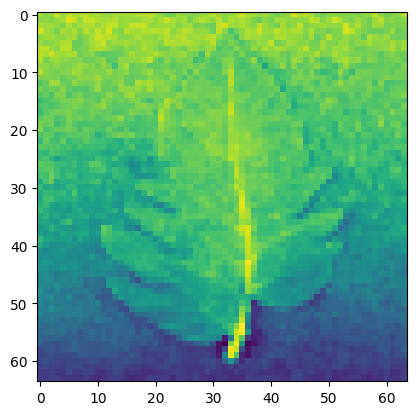

In [12]:
#rescalling image
rescale_image = rescale(myimage, 1.0/4.0, anti_aliasing=True)
print(plt.imshow(rescale_image))
print(rescale_image)

[[0.51902039 0.55444314 0.60354275 ... 0.5873298  0.59474941 0.59573765]
 [0.5226     0.54480235 0.57389569 ... 0.56460039 0.57136118 0.57388667]
 [0.5234251  0.52287608 0.51973882 ... 0.52837294 0.53222392 0.53694549]
 ...
 [0.24439608 0.25383922 0.26828627 ... 0.31288588 0.28323882 0.26951333]
 [0.27020941 0.29796784 0.33953333 ... 0.31123882 0.26481686 0.24072588]
 [0.28422039 0.32181725 0.37818431 ... 0.30410157 0.25280431 0.22533137]]
AxesImage(size=(400, 400))


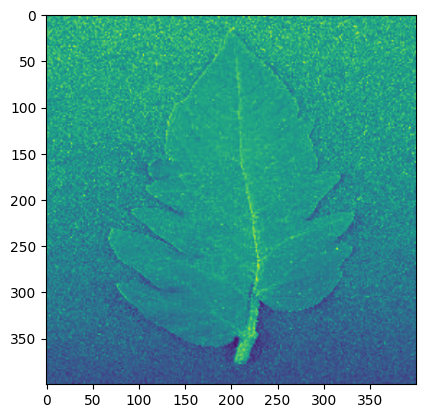

In [14]:
#resize image
resized_image = resize(myimage, (400, 400))
print(resized_image)
print(plt.imshow(resized_image))

In [2]:
img = cv2.imread("img_healthy1.JPG")
Window_name = "image"
cv2.imshow(Window_name, img)
cv2.waitKey(0)
cv2.destroyAllWindows()